Original Gray pixel values (50:55, 50:55):
 [[ 90  86 116 167 199]
 [ 95  95 100 114 137]
 [ 84 102 116 118 126]
 [ 96 104 111 122 139]
 [117 109  99 110 136]]
Quantized Gray (4 levels) pixel values:
 [[ 85  85  85 170 255]
 [ 85  85  85  85 170]
 [ 85  85  85  85  85]
 [ 85  85  85  85 170]
 [ 85  85  85  85 170]]


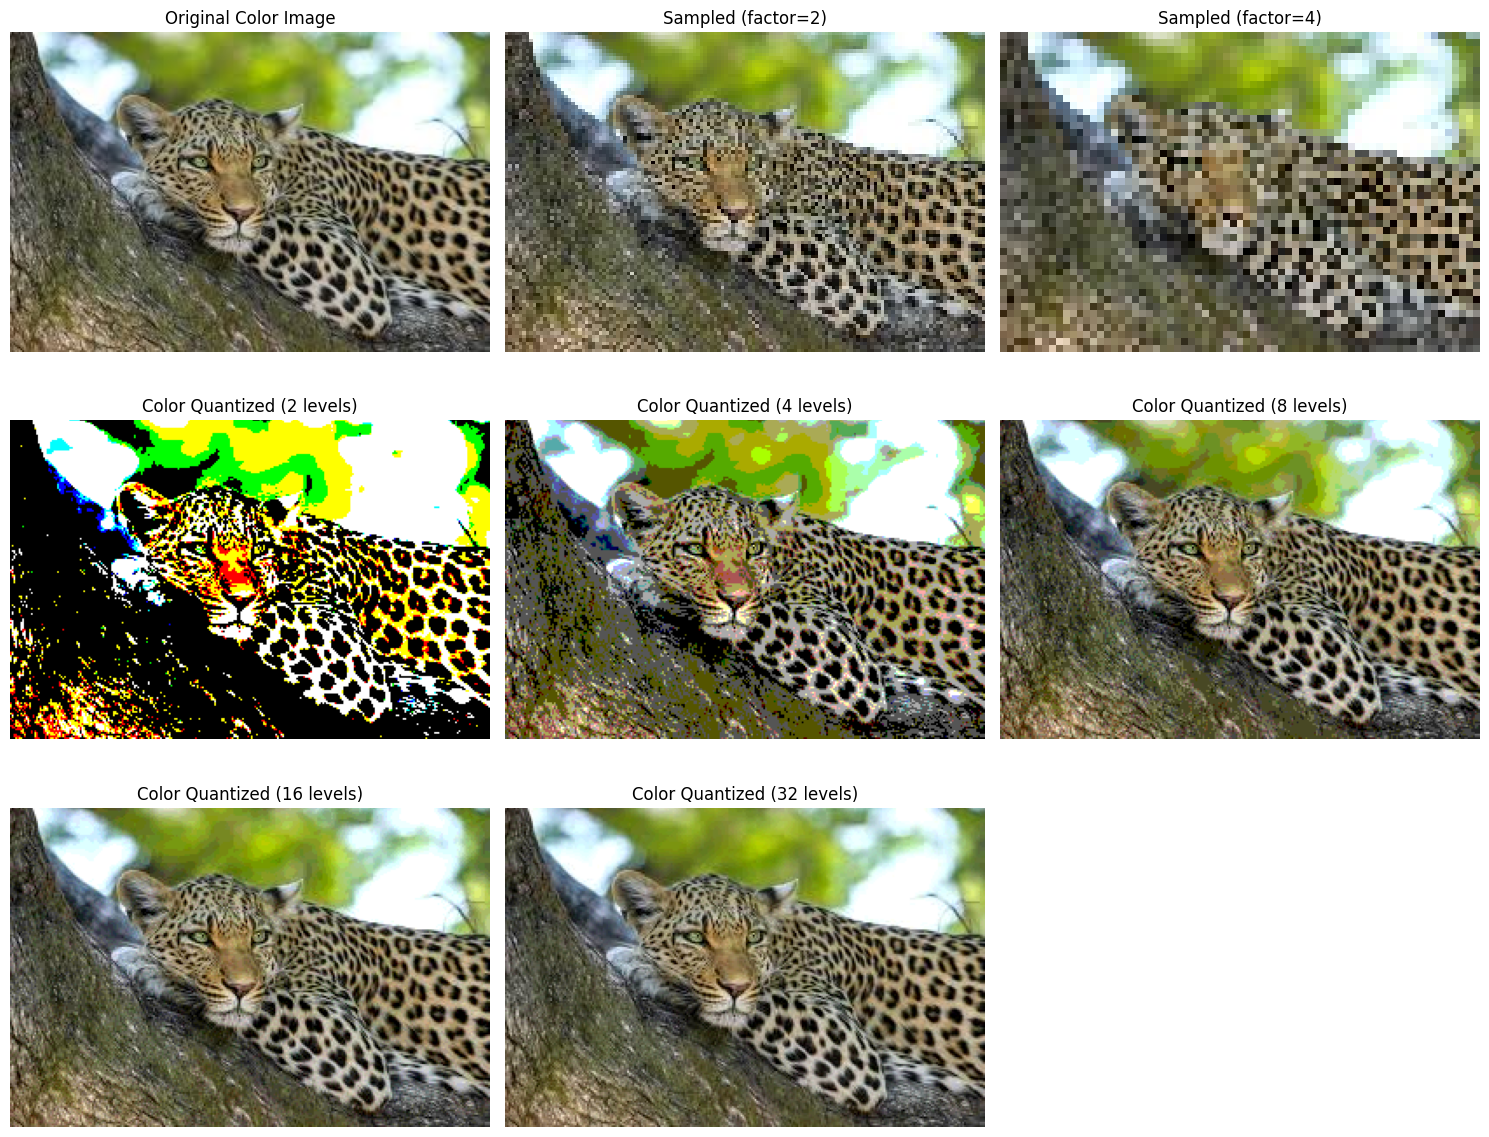

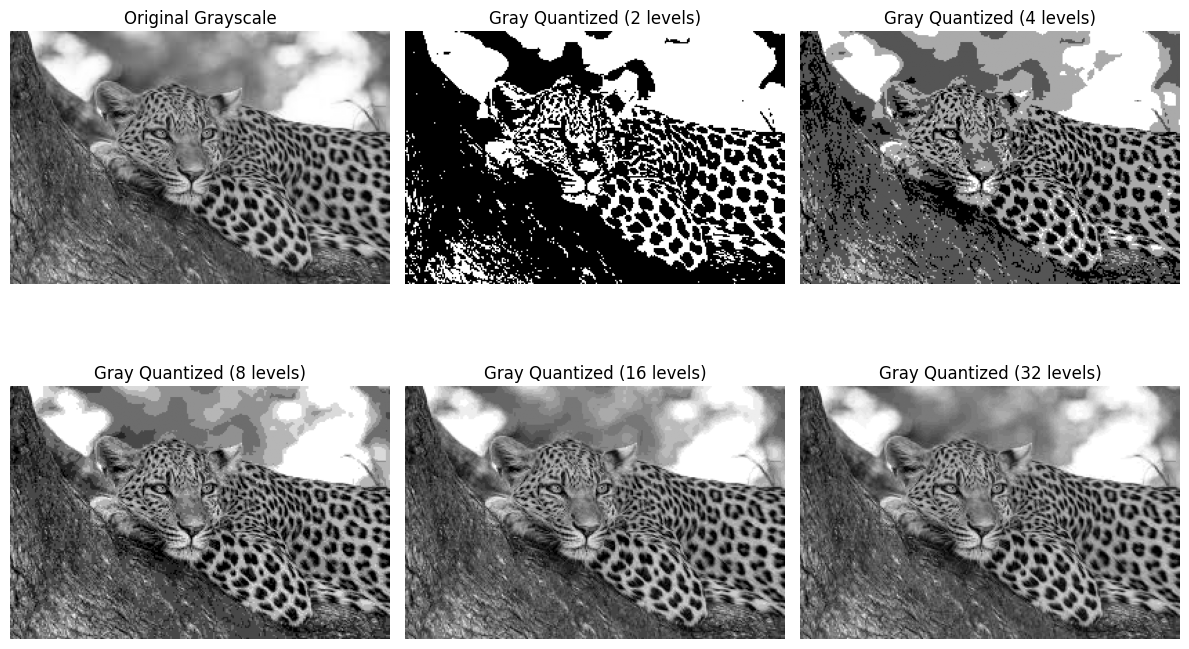

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen

def image_sampling(img, factor):
    return img[::factor, ::factor]

def image_quantization(img, levels):
    if levels < 2:
        raise ValueError("Levels must be >= 2")
    quantized = np.floor(img / (256 / levels))
    quantized = (quantized * (255 / (levels - 1))).astype(np.uint8)
    return quantized


url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYQwbHbE-PZDeu1aV2P3cPh6YHeiCD4dBQyw&s"
resp = urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sampled_2 = image_sampling(img, 2)
sampled_4 = image_sampling(img, 4)

# --- Color Quantization ---
quant_rgb_2 = image_quantization(img, 2)
quant_rgb_4 = image_quantization(img, 4)
quant_rgb_8 = image_quantization(img, 8)
quant_rgb_16 = image_quantization(img, 16)
quant_rgb_32 = image_quantization(img, 32)

# --- Grayscale Quantization ---
quant_gray_2 = image_quantization(img_gray, 2)
quant_gray_4 = image_quantization(img_gray, 4)
quant_gray_8 = image_quantization(img_gray, 8)
quant_gray_16 = image_quantization(img_gray, 16)
quant_gray_32 = image_quantization(img_gray, 32)

# --- Print pixel values example ---
print("Original Gray pixel values (50:55, 50:55):\n", img_gray[50:55, 50:55])
print("Quantized Gray (4 levels) pixel values:\n", quant_gray_4[50:55, 50:55])

# --- Display Color Images ---
plt.figure(figsize=(15, 12))
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title("Original Color Image")
plt.axis("off")

plt.subplot(3, 3, 2)
plt.imshow(sampled_2)
plt.title("Sampled (factor=2)")
plt.axis("off")

plt.subplot(3, 3, 3)
plt.imshow(sampled_4)
plt.title("Sampled (factor=4)")
plt.axis("off")

plt.subplot(3, 3, 4)
plt.imshow(quant_rgb_2)
plt.title("Color Quantized (2 levels)")
plt.axis("off")

plt.subplot(3, 3, 5)
plt.imshow(quant_rgb_4)
plt.title("Color Quantized (4 levels)")
plt.axis("off")

plt.subplot(3, 3, 6)
plt.imshow(quant_rgb_8)
plt.title("Color Quantized (8 levels)")
plt.axis("off")

plt.subplot(3, 3, 7)
plt.imshow(quant_rgb_16)
plt.title("Color Quantized (16 levels)")
plt.axis("off")

plt.subplot(3, 3, 8)
plt.imshow(quant_rgb_32)
plt.title("Color Quantized (32 levels)")
plt.axis("off")

plt.tight_layout()
plt.show()

# --- Display Grayscale Quantization ---
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(img_gray, cmap="gray")
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(quant_gray_2, cmap="gray")
plt.title("Gray Quantized (2 levels)")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(quant_gray_4, cmap="gray")
plt.title("Gray Quantized (4 levels)")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(quant_gray_8, cmap="gray")
plt.title("Gray Quantized (8 levels)")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(quant_gray_16, cmap="gray")
plt.title("Gray Quantized (16 levels)")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(quant_gray_32, cmap="gray")
plt.title("Gray Quantized (32 levels)")
plt.axis("off")

plt.tight_layout()
plt.show()
